<a href="https://colab.research.google.com/github/mvince33/Coding-Dojo/blob/main/week07/roc_curves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, RocCurveDisplay

In [6]:
# Load the data
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQxIXxB1WRXcvdmzpgq3kQC5V_-gWzy9IcKsi3AcynkalDTh8oQ2HoV713-_py-eTuRJQetjr_m1_e3/pub?output=csv'
df = pd.read_csv(url)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,7.0,3.2,4.7,1.4,0
1,6.4,3.2,4.5,1.5,0
2,6.9,3.1,4.9,1.5,0
3,5.5,2.3,4.0,1.3,0
4,6.5,2.8,4.6,1.5,0


In [10]:
# Set the features and target
X = df.drop(columns = 'target')
y = df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3)

In [11]:
# Build a logistic regression model
logreg = LogisticRegression(C = 0.001)
logreg_pipe = make_pipeline(StandardScaler(), logreg)
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=0.001))])

In [17]:
# Calculate AUC for training and test data
print(f'Training AUC: {roc_auc_score(y_train, logreg_pipe.predict_proba(X_train)[:, 1])}')
print(f'Testing AUC: {roc_auc_score(y_test, logreg_pipe.predict_proba(X_test)[:, 1])}')

Training AUC: 0.9565527065527065
Testing AUC: 0.987012987012987


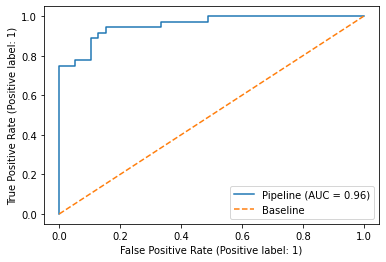

In [23]:
# Display the ROC curve
RocCurveDisplay.from_estimator(logreg_pipe, X_train, y_train)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline')
plt.legend()